# Model training with Logistic Regression

# Pre-requisite

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image

# Logistic Regression

**Logistic Regression** is used to solve **classification** problems.

More specifically, modeling the probabilities of the outcomes of the classification problem, and thus understanding logistic regression like an extension of linear regression to solve classification (_i.e._, for categorical data).

A visual comparison of Linear Regression vs. Logistic regression and especially their 'output' predictions $Y$ for different input points $X$ in a simple 1D case is depicted in the following image:

In [ ]:
Image(url='https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg', width=800)

# Section 1 - The sigmoid function and making predictions

In this section:
- 1.1 Implement and visualize the **sigmoid function**
- 1.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model

## 1.1  The sigmoid function

The '_sigmoid function_' $\sigma$, sometimes also called '_logistic function_', is a mathematical function that shows a characteristic "S"-shaped curve shown as in the figure above. This function in the logistic regression is commonly used to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid

In [ ]:
# Implement the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Visualising the sigmoid

In [ ]:
## Compute the output of the sigmoid function in a range from -10 to 10
x = np.linspace(-10, 10, 50, endpoint = True)
y = sigmoid(x)

Text(0.5, 0.98, 'Sigmoid Function Plots')

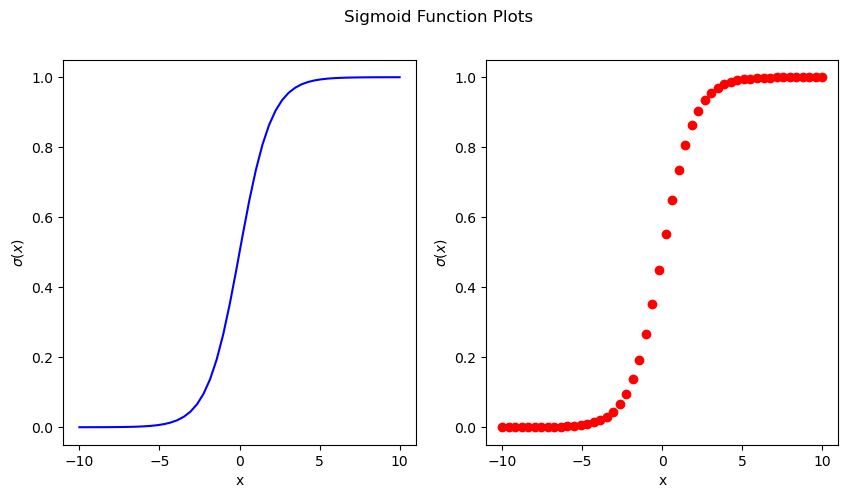

In [ ]:
## Visualize the result as a line plot in blue color
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x, y, color = 'blue')
ax1.set_xlabel('x')
ax1.set_ylabel('$\sigma(x)$')


ax2.scatter(x, y, color = 'red')
ax2.set_xlabel('x')
ax2.set_ylabel('$\sigma(x)$')

fig1.suptitle('Sigmoid Function Plots')

## 1.2 Making predictions
It is time to solve an actual classification problem using logistic regression.

A prediction $\hat{y}$ can be obtained by using the logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

### Visualizing the training and testing datasets

In [ ]:
# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data
# 'y_train' : labels for the training data
# 'X_test'  : test data used for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of pretrained weights for the logistic regression model

dataset1 = np.load('logistic_regression_dataset1.npz')
X_train = dataset1['X_train']
y_train = dataset1['y_train']
X_test = dataset1['X_test']
y_test = dataset1['y_test']
w_pret = dataset1['w_pret']

In [ ]:
# Check the shape of the data!

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print(f'w_pret: {w_pret.shape}')

X_train: (600, 2)
y_train: (600, 1)
X_test: (400, 2)
y_test: (400, 1)
w_pret: (2, 1)


Text(0, 0.5, 'Feature 2')

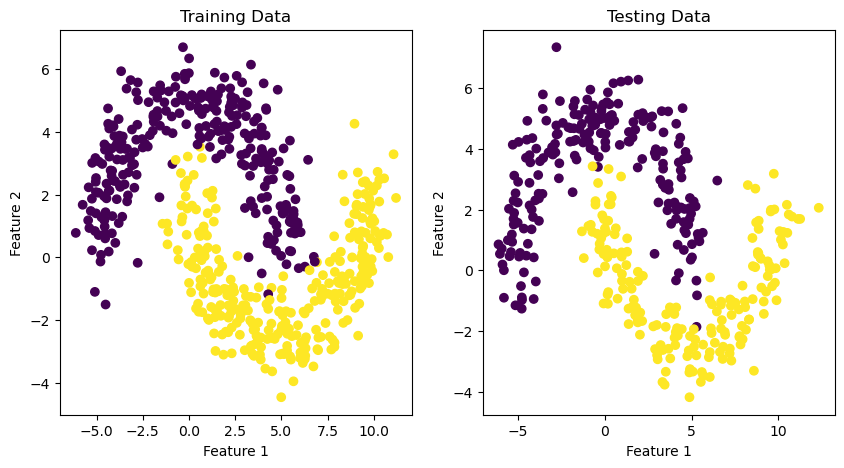

In [ ]:
# Visualize the training data and testing data using subplots
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis') #(Feature 1, Feature 2, Classification, Colormap)
ax1.set_title('Training Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
ax2.set_title('Testing Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

### Predicting class probabilities via logistic regression
After having obtained the data and a set of pretrained weights for the logistic regression model:
- Implement a function to predict outcomes using a linear regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Write a function on the read-in training data $\boldsymbol{X}_{train}$

In [ ]:
# Write a prediction function -> predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):
    y_hat = sigmoid(X @ w)
    return y_hat

Test the predict function on the $\boldsymbol{X}_{train}$ data and compare the output shape to the shape of the provided labels $\boldsymbol{y}_{train}$.

In [ ]:
# Test on the read-in X_train data:
y_hat_data = predict(X_train, w_pret)

# Compare shapes:
print(y_hat_data.shape)
print(y_train.shape)

# check first predicted element
print("The first predicted element of y_hat_data: ", y_hat_data[0, 0])
print("The first predicted element of y_train: ", y_train[0, 0])

(600, 1)
(600, 1)
The first predicted element of y_hat_data:  0.9827899169080665
The first predicted element of y_train:  1


# Section 2 - Training a model via Gradient Descent

In this second task:
- 2.1 Implement a function that computes and returns **gradient and cost** of the logistic regression
- 2.2 Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train the logistic regression model** given some training data
- 2.3 **Evaluate the model** on previously unseen test data points


The so-called _Cross Entropy_ Loss is commonly used to calculate the cost of the logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z) = 1 / (1 + \exp(-z))$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>
The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

## 2.1  Gradient and Cost Computation
In this part, defining a function that is able to compute the cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of the loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$. </br>
Computing the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

In [ ]:
def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    # Set of samples X (each sample is a row in X),
    # Corresponding ground-truth labels y
    # Predicted class probabilities y_hat

    # Import smallest number represented to handle log(0) edge case
    eps = 1e-12
    # Compute the mean cross-entropy loss
    m = X.shape[0]
    loss = - (1 / m) * np.sum(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    # log(0) might throw error, so handled via small eps -> Might be irrelevant, to be tested

    # Compute the gradient vector
    grad_vec = (1 / m) * np.sum((y_hat - y) * X, axis = 0)
    grad_vec = np.expand_dims(grad_vec, 0)

    # Return loss and gradient vector
    return loss, grad_vec.transpose()

## 2.2 Training with Gradient Descent

Gradient descent, sometimes also referred to as _steepest descent_, is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. The idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point.

In this section, the **Gradient Descent algorithm** as a function is implemented that using afterwards to train the logistic regression model.

In [ ]:
## Setting some hyperparameters:
lr = 0.5         # Learning rate
num_epochs = 20    # Number of iterations

In [ ]:
def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    ## Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of the gradient descent optimisation procedure
    losses = []
    grad_vecs = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds = predict(X_train, w)
        # Compute loss and gradient vector for current prediction
        loss, grad_vec = compute_loss_and_grad(X_train, y_train, preds)

        # update the weight parameter according to the GD here
        w = w - lr * grad_vec

        losses.append(loss)
        grad_vecs.append(grad_vec)

        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

In [ ]:
## Run the function on the training set

## Start from a random initialisation
np.random.seed(12345)
w_init = np.random.randn(X_train.shape[1],1)

# Obtain the final weights via gradient descent
w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=True)

Ep  1 | Loss: 1.737
Ep  2 | Loss: 0.731
Ep  3 | Loss: 0.410
Ep  4 | Loss: 0.299
Ep  5 | Loss: 0.287
Ep  6 | Loss: 0.286
Ep  7 | Loss: 0.286
Ep  8 | Loss: 0.285
Ep  9 | Loss: 0.285
Ep 10 | Loss: 0.285
Ep 11 | Loss: 0.285
Ep 12 | Loss: 0.284
Ep 13 | Loss: 0.284
Ep 14 | Loss: 0.284
Ep 15 | Loss: 0.284
Ep 16 | Loss: 0.284
Ep 17 | Loss: 0.284
Ep 18 | Loss: 0.284
Ep 19 | Loss: 0.284
Ep 20 | Loss: 0.284


## 2.3 Evaluating the trained model
To this end:
- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report the obtained accuracies for both training and test data

In [ ]:
# Evaluate the obtained model on training data and previously unseen test data

# Obtain predicted class probabilities for train and test data
y_hat_train = predict(X_train, w_final)
y_hat_test  = predict(X_test, w_final)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_hat_train = []
c_hat_test = []

for i in y_hat_train:
    if i >= 0.5:
        c_hat_train.append(1)
    else:
        c_hat_train.append(0)

for i in y_hat_test:
    if i >= 0.5:
        c_hat_test.append(1)
    else:
        c_hat_test.append(0)

# Evaluate the classification accuracy for training and test data
acc_train = np.sum(np.expand_dims(np.array(c_hat_train), axis = 1) == y_train)/y_train.shape[0]
acc_test = np.sum(np.expand_dims(np.array(c_hat_test), axis = 1) == y_test)/y_test.shape[0]

# Print outputs
print(f'Training accuracy: {acc_train:.3f} | Test accuracy: {acc_test:.3f}')

Training accuracy: 0.868 | Test accuracy: 0.853


# Section 3 - Analysing convergence and accuracy

In [ ]:
## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 1.0, 2.5, 5., 10.]
# Max number of iterations for GD algorithm to run
num_epochs = 20

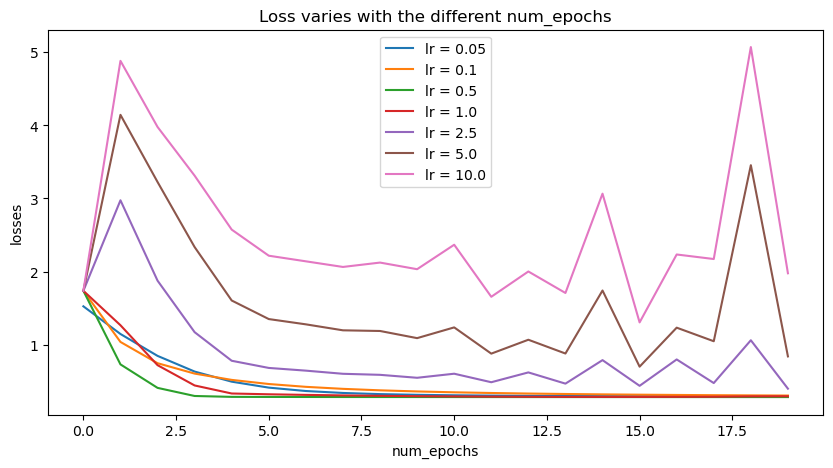

In [ ]:
# Run gradient descent for all learning rates, and plot results
fig3 = plt.figure(figsize=(10, 5))

x_vals = range(num_epochs)
leg = []  # legend entries
w_finals = {}

for lr in lrs:
    ## Start from a random initialisation
    w_init = np.random.randn(X_train.shape[1], 1)
    ## Start from a random initialisation
    np.random.seed(12345)

    # Obtain the final weights via gradient descent
    w_final, losses, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False)
    plt.plot(x_vals, losses)
    leg.append(f'lr = {lr}')
    w_finals[f'lr={lr}'] = w_final

# Add legend, title and label the axes
plt.title("Loss varies with the different num_epochs")
plt.xlabel("num_epochs")
plt.ylabel("losses")
plt.legend(leg)

In [ ]:
# Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
    y_hat = predict(X, w)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat = []
    for i in y_hat:
        if i >= 0.5:
            c_hat.append(1)
        else:
            c_hat.append(0)

    # Evaluate the classification accuracy
    acc = (np.sum(np.expand_dims(np.array(c_hat), axis = 1) == y)/y.shape[0])

    return acc

print(' >>> Training accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_train, y_train, v),3)}')

print('\n >>> Test accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_test, y_test, v), 3)}')

 >>> Training accuracies for different learning rates: <<<
lr=0.05: 	 0.868
lr=0.1: 	 0.863
lr=0.5: 	 0.868
lr=1.0: 	 0.855
lr=2.5: 	 0.838
lr=5.0: 	 0.822
lr=10.0: 	 0.833

 >>> Test accuracies for different learning rates: <<<
lr=0.05: 	 0.852
lr=0.1: 	 0.84
lr=0.5: 	 0.852
lr=1.0: 	 0.83
lr=2.5: 	 0.815
lr=5.0: 	 0.798
lr=10.0: 	 0.812


# Section 4 - Using non-linear features for better classification

In this section:
- 4.1 Visualize dataset and create non-linear train and test datasets.
- - Scenario 1: $\mathbb{R}^2 \ni x = (x_1,x_2)^\top$
- - Scenario 2: $\mathbb{R}^i \ni x = ? $, suggest the mapping and value for **i** considering data distribution.
- 4.2 Using above functions (predict, compute_loss_and_grad), **train the logistic regression model** given some training data on scenario 1. **Evaluate the model** on previously unseen test data points.
- 4.3 **Plot the decision boundary** for scenario 1 on test data.
- 4.4 Using above functions (predict, compute_loss_and_grad), **train the logistic regression model** given some training data on scenario 2. **Evaluate the model** on previously unseen test data points.
- 4.5 **Plot the decision boundary** for scenario 2 on test data.
- 4.6 Evaluate model's performance adapting **Decaying learning rate** during training for scenario 2.

In [ ]:
Image(url='https://miro.medium.com/v2/resize:fit:828/format:webp/1*aE8XLyApqvaQA9B7MWjjlA.png', width=700)

## 4.1 Load data and create train and test dataset

To get an idea about the data distribution, visualize train and test data using matplotlib. Then map $\mathbb{R}^2$ to $\mathbb{R}^i$ and create anothor train dataset.

In [ ]:
# Load numpy dataset from logistic_regression_dataset2.npz
dataset2 = np.load('logistic_regression_dataset2.npz')

# Create train and test datasets
# (X_train_circle--> arr_0, X_test_circle--> arr1_, Y_train_circle--> arr_2, Y_test_circle--> arr_3)
X_train_circle = dataset2['arr_0']
X_test_circle = dataset2['arr_1']
Y_train_circle = dataset2['arr_2']
Y_test_circle = dataset2['arr_3']

In [ ]:
# Check the shape of the data!

print(f'X_train: {X_train_circle.shape}')
print(f'y_train: {Y_train_circle.shape}')
print(f'X_test: {X_test_circle.shape}')
print(f'y_test: {Y_test_circle.shape}')

X_train: (600, 2)
y_train: (600, 1)
X_test: (400, 2)
y_test: (400, 1)


Text(0, 0.5, 'Feature 2')

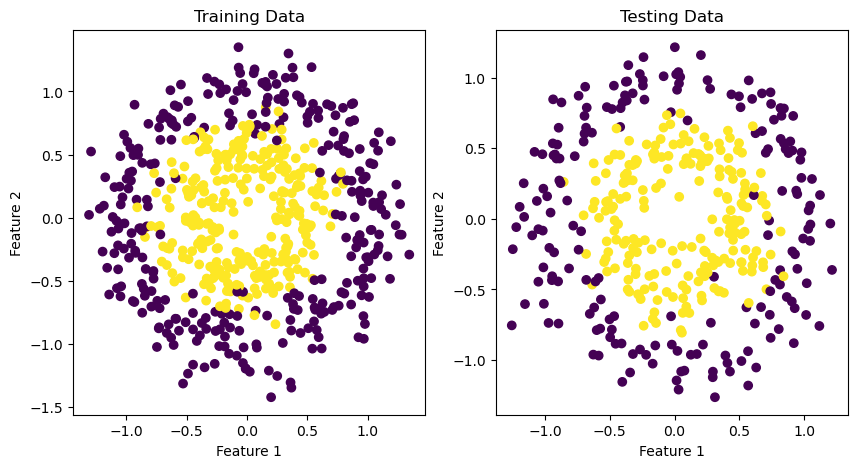

In [ ]:
# Visualize non-linear features for both train and test data
fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_train_circle[:, 0], X_train_circle[:, 1], c=Y_train_circle, cmap='viridis')
ax1.set_title('Training Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X_test_circle[:, 0], X_test_circle[:, 1], c=Y_test_circle, cmap='viridis')
ax2.set_title('Testing Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

In [ ]:
# Mapping R^2 to R^i
squared_test = np.square(X_test_circle)
squared_train = np.square(X_train_circle)

bias_test = np.ones(shape=(X_test_circle.shape[0],1))
bias_train = np.ones(shape=(X_train_circle.shape[0],1))

X_test_circle_hat = np.concatenate((bias_test, X_test_circle, squared_test), axis=1)
X_train_circle_hat = np.concatenate((bias_train, X_train_circle, squared_train), axis=1)

## 4.2 Train the model using GD for scenario 1 data

For Scenario 1, the decision boundary is linear because of two-dimentional inputs, as shown in the figure below.

Train the model using scenario 1 data and evaluate model's test accuracy. Use predict and compute_loss_and_grad functions during training loop.

In [ ]:
lr = 1.0
num_epochs = 30

loss = np.zeros(num_epochs)
theta = np.random.randn(X_train_circle.shape[1],1)

for ep in range(num_epochs):
    # call predict function
    Y_train_hat = predict(X_train_circle, theta)

    # call the compute_loss_and_grad
    loss[ep], grad_vec = compute_loss_and_grad(X_train_circle, Y_train_circle, Y_train_hat)

    # update the theta parameter according to the GD here
    theta =  theta - lr * grad_vec

# Obtain predicted class probabilities for train and test datasets
Y_test_hat = predict(X_test_circle, theta)
Y_train_hat = predict(X_train_circle, theta)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_test_hat = []
c_train_hat = []

for i in Y_test_hat:
    if i >= 0.5:
        c_test_hat.append(1)
    else:
        c_test_hat.append(0)

for i in Y_train_hat:
    if i >= 0.5:
        c_train_hat.append(1)
    else:
        c_train_hat.append(0)

# Evaluate the classification accuracy for training and test data
test_score = (np.sum(np.expand_dims(np.array(c_test_hat), axis=1) == Y_test_circle)/Y_test_circle.shape[0])
train_score = (np.sum(np.expand_dims(np.array(c_train_hat), axis=1) == Y_train_circle)/Y_train_circle.shape[0])

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy: {:.3f}".format(test_score))

Training accuracy: 0.518
Test accuracy: 0.487


## 4.3 Decision Boundary for model trained with scenario 1 data

Plot the decision boundary for the model trained on scenario 1 data. For two dimentional inputs, the decision boundary is linear.

Text(0.5, 1.0, 'Linear Decision Boundary')

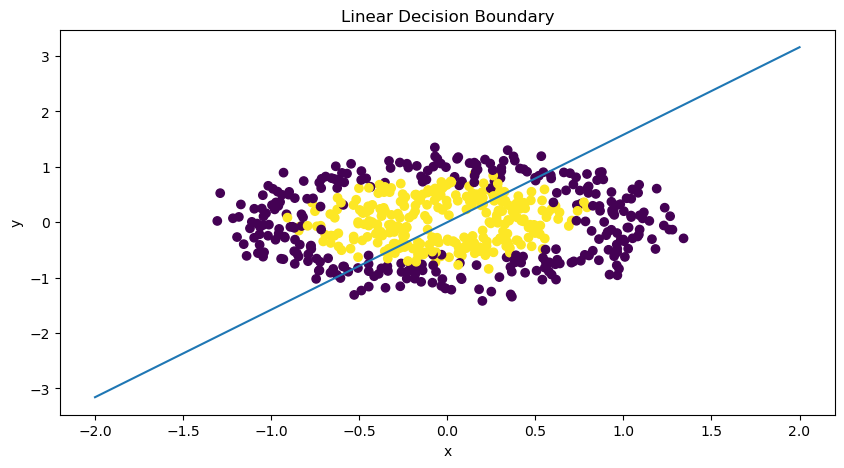

In [ ]:
x_lnr = np.linspace(-2,2,500)

# Predict decision boundary
y_lnr = -theta[0] * x_lnr / theta[1] # x2 = - theta0 * x1 / theta1

# Visualize ground truth data of testing dataset and the predicted decision boundary
fig6 = plt.figure(figsize=(10, 5))

plt.scatter(X_train_circle[:, 0], X_train_circle[:, 1], c=Y_train_circle, cmap='viridis')
plt.plot(x_lnr, y_lnr)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Decision Boundary")

## 4.4 Train the model using GD for scenario 2 data

Now, train the model using scenario 2 data and evaluate model's test accuracy.

Again, use predict and compute_loss_and_grad functions during training loop.

In [ ]:
lr = 1.0
num_epochs = 30

loss = np.zeros(num_epochs)
theta = np.random.randn(X_train_circle_hat.shape[1],1)

for ep in range(num_epochs):
    # call predict function
    Y_train_hat = predict(X_train_circle_hat, theta)

    # call the compute_loss_and_grad
    loss[ep], grad_vec = compute_loss_and_grad(X_train_circle_hat, Y_train_circle, Y_train_hat)

    #update the theta parameter according to the GD here
    theta =  theta - lr*grad_vec

# Obtain predicted class probabilities for train and test datasets
Y_test_hat = predict(X_test_circle_hat, theta)
Y_train_hat = predict(X_train_circle_hat, theta)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_test_hat = []
c_train_hat = []

for i in Y_test_hat:
    if i >= 0.5:
        c_test_hat.append(1)
    else:
        c_test_hat.append(0)

for i in Y_train_hat:
    if i >= 0.5:
        c_train_hat.append(1)
    else:
        c_train_hat.append(0)

# Evaluate the classification accuracy for training and test data
test_score = (np.sum(np.expand_dims(np.array(c_test_hat), axis = 1) == Y_test_circle) / Y_test_circle.shape[0])
train_score = (np.sum(np.expand_dims(np.array(c_train_hat), axis = 1) == Y_train_circle) / Y_train_circle.shape[0])

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy: {:.3f}".format(test_score))

Training accuracy: 0.917
Test accuracy: 0.895


## 4.5 Decision Boundary for model trained with scenario 2 data

Plot the decision boundary for the model trained on scenario 2 data.

Text(0.5, 1.0, 'Non-Linear Decision Boundary')

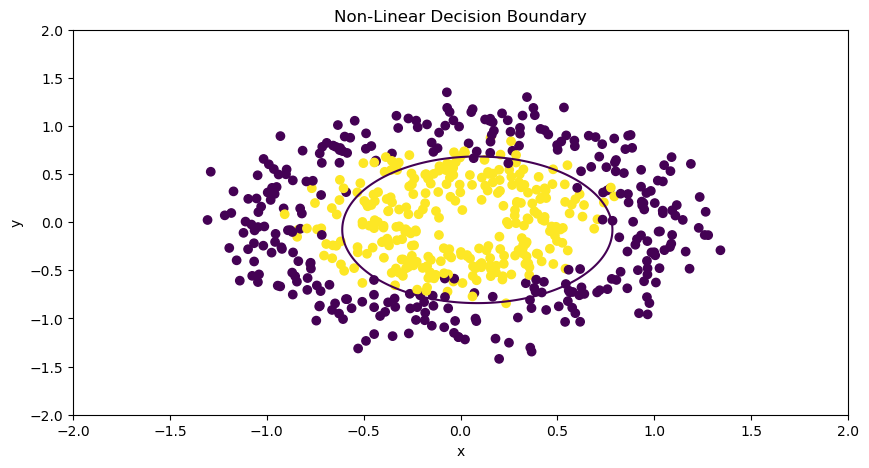

In [ ]:
x_circle = np.linspace(-2,2,500)
y_circle = np.linspace(-2,2,500)

[X2, Y2] = np.meshgrid(x_circle, y_circle)

# Reshape data according to the scenario 2 mapping and predict decision boundary
boundary = theta[0] + theta[1] * Y2 + theta[2] * X2 + theta[3] * (Y2 * Y2) + theta[4] * (X2 * X2)

# Visualize ground truth data of testing dataset and the predicted decision boundary
fig = plt.figure(figsize=(10, 5))

plt.scatter(X_train_circle[:, 0], X_train_circle[:, 1], c=Y_train_circle, cmap='viridis')
plt.contour(X2, Y2, boundary, [0])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linear Decision Boundary")